https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv

In [ ]:
#for data analysis and data manipulation,importing pandas library as pd
import pandas as pd
#for various numerical computations and processing of the multidimensional and single-dimensional array elements
#importing numpy library as np
import numpy as np


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving penguins.csv to penguins.csv


In [ ]:
#read_csv is used from pandas library to read datasets('csv files')
data = pd.read_csv('penguins.csv')
#dataset consists species of penguins
#It consists of bill('beak') and flippers('wings')


In [ ]:
#The head() function is used to get the first n rows. This function returns the first n rows for the object based on position
data.head()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species,species_val
0,39.1,18.7,181,3750,MALE,Adelie,0
1,39.5,17.4,186,3800,FEMALE,Adelie,0
2,40.3,18.0,195,3250,FEMALE,Adelie,0
3,37.5,18.6,194,3350,MALE,Adelie,0
4,36.7,19.3,193,3450,FEMALE,Adelie,0


In [ ]:
#defining the input x and output y
X = data.iloc[ : , : 4]
Y = data.iloc[ : , 6 ]

In [ ]:
#showing the shape of input values x
X.shape

(344, 4)

In [ ]:
#showing the output value
Y


0      0
1      0
2      0
3      0
4      0
      ..
338    2
339    2
340    2
341    2
342    2
Name: species_val, Length: 343, dtype: int64

In [ ]:
#for Splitting x & y into training and testing sets importing train_test_split from sklearn.model_selection library

from sklearn.model_selection import train_test_split

#By passing our x and y variables into the train_test_split method,
#we are able to capture the splits in data by assigning 4 variables to the result.

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.4, random_state = 41)

In [ ]:
#Firstly, importing of sklearn.linear_model is required for us to access LogisticRegression.

from sklearn.linear_model import LogisticRegression

#Instantiate the logisticRgeression AS classifier
#Here the ‘multinomial’ option is supported for my dataset is only by the solver 'sag'
#Maximum number of iterations taken for the solvers to converge is by default 100 but
#For this datasets i have used 10000 iterations
  
classifier = LogisticRegression(solver='sag',max_iter=10000)

In [ ]:
#fit model to training data
classifier.fit(X_train, Y_train)

LogisticRegression(max_iter=10000, solver='sag')

In [ ]:
#Making predictions based on my model
Y_pred = classifier.predict(X_test)


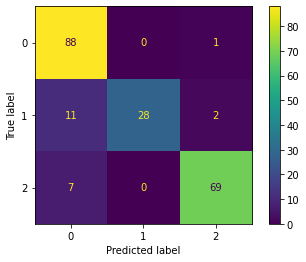

In [ ]:
#A confusion matrix is a table that is often used to describe the performance of a classification model
#importing confusion matrix from sklearn.metrics library
from sklearn.metrics import confusion_matrix
#importing confusion matrix display for displaying the data of confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
Y_pred = classifier.predict(X_test)
#instantiate the confusion matrix as cm
cm = confusion_matrix(Y_test, Y_pred)
#displaying the confusion matrics with true label and predicted label
cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
#showing the confusion matrix of 3 classes as 'Adelie=0','Chinstrap=1','Gentoo=2'
print (pd.DataFrame(confusion_matrix(Y_test, Y_pred), columns=['Adelie=0','Chinstrap=1','Gentoo=2']))

   Adelie=0  Chinstrap=1  Gentoo=2
0        88            0         1
1        11           28         2
2         7            0        69


In [ ]:
#The classification report is about key metrics in a classification problem
#we'll have precision, recall, f1-score and support for each class we're trying to find.
#importing classification report from sklearn.metrics library
from sklearn.metrics import classification_report
#printing the classification report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90        89
           1       1.00      0.68      0.81        41
           2       0.96      0.91      0.93        76

    accuracy                           0.90       206
   macro avg       0.93      0.86      0.88       206
weighted avg       0.91      0.90      0.90       206



In [ ]:
#printing the accuracy of model from classification report
print('Accuracy of the model is:', classifier.score(X_test, Y_test))

Accuracy of the model is: 0.8980582524271845


In [ ]:
#importing metrics from sklearn library
from sklearn import metrics
#printing the average recall of model using metrics from sklearn library
print('Recall of the model is:', metrics.recall_score(Y_test, Y_pred, average='macro'))

Recall of the model is: 0.859861870351406


In [ ]:
#printing the average precision of model
print('Precision of the model is:',metrics.precision_score(Y_test, Y_pred, average='macro'))

Precision of the model is: 0.9295073375262054


In [ ]:
#printing the average f score of model
print('f1-score of the model is:',metrics.f1_score(Y_test, Y_pred, average='macro'))

f1-score of the model is: 0.8821969126316952


In [ ]:
#examine the class distribution of the testing set (using a Pandas Series method)
Y_test.value_counts()

0    89
2    76
1    41
Name: species_val, dtype: int64

In [ ]:
#calculate null accuracy
Y_test.value_counts().head() / len(Y_test)

0    0.432039
2    0.368932
1    0.199029
Name: species_val, dtype: float64